# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Konstan Aftop Anewata Ndruru
- **Email:** konstanaftopn@gmail.com
- **ID Dicoding:** konstan_aftop

## Menentukan Pertanyaan Bisnis

- Bagaimana tren konsentrasi PM2.5 di setiap stasiun sepanjang tahun 2016?
- Bagaimana perubahan suhu mempengaruhi konsentrasi polutan PM2.5, CO, dan NO2 di setiap musim pada tahun 2016 di Stasiun Shunyi?

## Import Semua Packages/Library yang Digunakan

In [6]:
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns

## Data Wrangling

### Gathering Data

In [7]:
folder_path = "data"
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))
dfs = []
for file in csv_files:
    df = pd.read_csv(file)  
    dfs.append(df) 
df_merged = pd.concat(dfs, ignore_index=True)

**Insight:**
- Dataset mencakup 12 stasiun pengamatan yang disimpan dalam file .csv terpisah.
- Pada sel kode di atas saya menggabungkan semua dataset dengan method concat pandas.

### Assessing Data

In [8]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


Saya menggunakan method info untuk melihat jumlah instances setiap atribut dan tipe dari masing masing atribut

In [9]:
df_merged.isna().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

Pengecekan missing data dengan method isna kemudian menjumlahkan baris yang na dengan method sum.

In [10]:
df_merged.duplicated().sum()

np.int64(0)

Pengecekan nilai duplikat dengan method duplicated kemudian menjumlahkannya dengan method sum.

In [11]:
# Mengambil nama atribut yang numerikal
numeric_columns=df_merged.select_dtypes(include='number').columns

In [12]:
outlier_dict={}
for col in numeric_columns:
    q1=np.quantile(df_merged[col].dropna(), 0.25)
    q3=np.quantile(df_merged[col].dropna(), 0.75)
    iqr=q3-q1
    lower, upper= q1-1.5*iqr , q3+1.5*iqr
    outlier=[x for x in df_merged[col] if x<lower or x>upper]
    outlier_dict[col]=len(outlier)
outlier_dict=pd.DataFrame.from_dict(outlier_dict, orient='index', columns=['outliers'])
outlier_dict

,outliers
No,0
year,0
month,0
day,0
hour,0
PM2.5,19142
PM10,14658
SO2,35566
NO2,7021
CO,28054


Mengambil nilai outlier untuk setiap atribut numerik, kemudian menyimpannya ke dalam dictionary yang kemudian diconvert menjadi dataframe.

In [13]:
df_merged.describe(include='all')

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,418946,420450.000000,420768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43335,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,NaN,1.729711,NaN
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,NaN,1.246386,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,NaN,0.900000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,NaN,1.400000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,NaN,2.200000,NaN


**Insight:**
- Atribut No bisa dihapus.
- Atribut year month day seharusnya bisa disatukan dan diconvert tipenya menjadi datetime.
- Terdapat missing data pada beberapa atribut (bisa dilihat pada bagian checking missing data)
- Tidak terdapat duplicated data
- Terdapat outlier pada beberapa atribut (bisa dilihat pada bagian checking outliers)
- Dengan asumsi, satuannya microgram/meter kubik,  Terdapat inaccurate value pada bagian PM2.5, PM10, SO2, NO2, CO, O3, dilihat dari nilai max yang sangat jauh dari rata rata dan tiap quartilnya. Hal ini juga termasuk dalam outlier atau anomali data. Hal ini ada kemungkinan terjadinya kesalahan sensor.

### Cleaning Data

In [14]:
df_merged.drop(columns=['No'], inplace=True)
df_merged['date'] = df_merged['year'].astype(str) + '-' + \
                    df_merged['month'].astype(str) + '-' + \
                    df_merged['day'].astype(str) + ' ' + \
                    df_merged['hour'].astype(str) + ':00:00'

df_merged['date']=pd.to_datetime(df_merged['date'])
df_merged.set_index('date', inplace=True)
df_merged.drop(columns=['year' , 'month','day', 'hour'], inplace=True)
df_merged

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
date,,,,,,,,,,,,,
2013-03-01 00:00:00,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
2013-03-01 01:00:00,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2013-03-01 02:00:00,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
2013-03-01 03:00:00,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
2013-03-01 04:00:00,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
2017-02-28 20:00:00,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
2017-02-28 21:00:00,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong


Karna, saya akan melakukan analisis time series, atribut year month day dan hour saya gabungkan menjadi index date yang bertipe datetime.

In [15]:
numeric_columns=df_merged.select_dtypes(include='number').columns
numeric_columns_without_rainwspm=list(set(numeric_columns)-set(['RAIN','WSPM']))
categorical_columns=df_merged.select_dtypes(include='object').columns
# Memisahkan numeric columns dan categorical columns, dan untuk numeric_columns yang tidak mengikutkan hujan dan windspeed.

In [16]:
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

df_merged[numeric_columns] = num_imputer.fit_transform(df_merged[numeric_columns])
df_merged[categorical_columns] = cat_imputer.fit_transform(df_merged[categorical_columns])

Melakukan handling missing data dengan teknik imputasi. Untuk kolom numerik, diimputasi dengan median, hal ini dikarenakan atribut numerik memilki outlier. Pemiliihan median bisa lebih stabil dalam menangani anomali seperti outlier. Sedangkan, atribut kategorik diimputasi dengan modus nilai terbanyak.

In [17]:
for col in numeric_columns_without_rainwspm: 
    q1 = np.quantile(df_merged[col].dropna(), 0.25)
    q3 = np.quantile(df_merged[col].dropna(), 0.75)
    iqr = q3 - q1
    lower_bound, upper_bound = q1 - 1.5 * iqr, q3 + 1.5 * iqr

    df_merged[col] = df_merged[col].where((df_merged[col] >= lower_bound) & (df_merged[col] <= upper_bound), upper_bound)


Melakukan capping nilai outlier dengan batas atas dan batas bawahnya. Hal ini dikarenakan data tidak bisa dihapus karna bersifat time series, dan jika diinterpolasi, hasilnya sangat buruk. Tentu, konsekuensinya data akan ada kecenderungan berfrekuensi banyak di batas awal atau batas akhir tersebut (bisa dilihat pada histogram)

In [18]:
df_merged

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
date,,,,,,,,,,,,,
2013-03-01 00:00:00,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
2013-03-01 01:00:00,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2013-03-01 02:00:00,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
2013-03-01 03:00:00,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
2013-03-01 04:00:00,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
2017-02-28 20:00:00,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
2017-02-28 21:00:00,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong


**Insight:**
- Terdapat kolom baru berupa date yang merupakan index bertipe datetime, gabungan dari atribut year month day dan hour dari dataset.
- Data missing yang diidentifikasi sebelumnya telah ditangani dengan teknik imputasi.
- Data outliers yang diidentifikasi sebelumnya telah ditangani dengan teknik capping.

## Exploratory Data Analysis (EDA)

### Explore ...

In [19]:
df_merged.describe(include='all')

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768,420768.000000,420768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45157,NaN,35064
mean,75.310980,100.907319,13.136078,49.958119,1116.242255,55.132409,13.539885,1010.746658,2.491405,0.064416,NaN,1.729461,NaN
std,66.812722,79.152311,13.414130,33.148701,804.546339,49.930640,11.430768,10.469168,13.787252,0.820626,NaN,1.245947,NaN
min,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,NaN,0.000000,NaN
25%,21.000000,36.000000,3.000000,24.000000,500.000000,12.000000,3.100000,1002.300000,-8.900000,0.000000,NaN,0.900000,NaN
50%,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,NaN,1.400000,NaN
75%,109.000000,144.000000,19.000000,70.000000,1500.000000,80.000000,23.200000,1019.000000,15.100000,0.000000,NaN,2.200000,NaN


Setelah dilakukan proses cleaning, dan penyesuaian data dengan domain knowledge terkait satuan dari atribut yang ada. Dianggap data sudah sesuai dan siap digunakan.

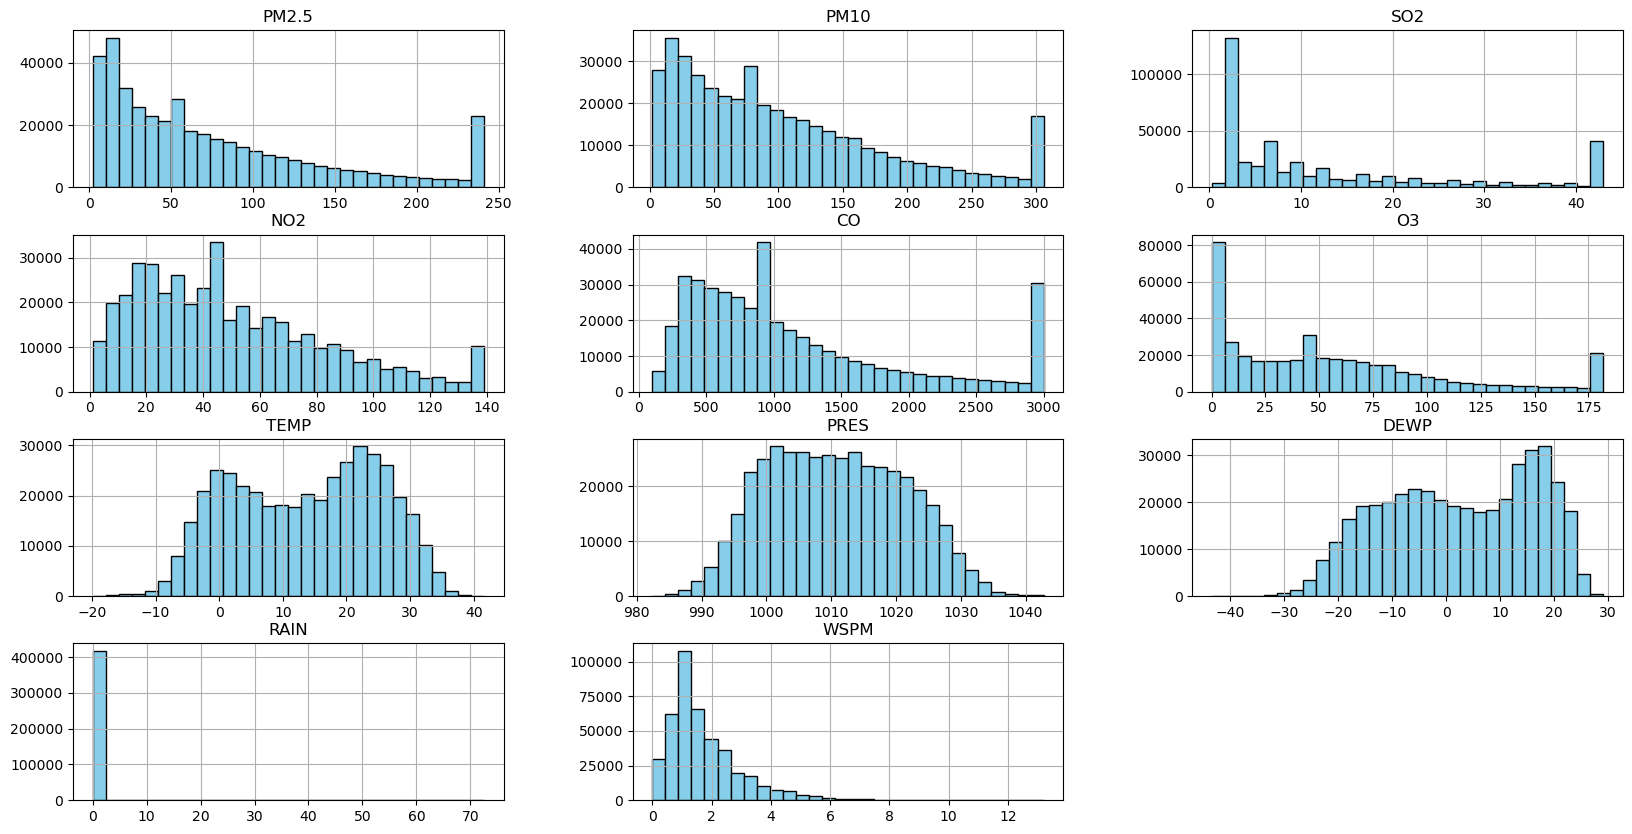

In [20]:
df_merged.hist(figsize=(20,10), bins=30, edgecolor='black', color='skyblue')
plt.show()

Berikut merupakan histogram dari atribut numerik pada data.
Terlihat, atribut polutan cenderung right-skewed yang artinya nilainya dominan rendah. Namun, terdapat nilai dengan frekuensi tinggi di akhir efek dari teknik capping outlier.
Kemudian, untuk atribut parameter meteorologi temperatur berdistribusi bimodal(memiliki dua nilai dengan frekuensi banyak), hal ini bisa jadi dipengaruhi oleh variasi temperatur di tiap musimnya.
Untuk tekanan, distribusi normal.

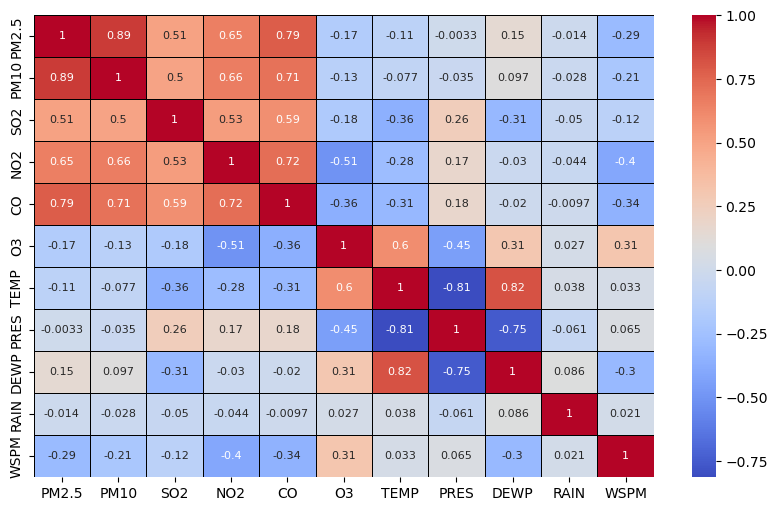

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(df_merged.corr(numeric_only=True, method='pearson'), annot=True, linewidths=0.5, linecolor='black', annot_kws={'size' : 8} ,cmap='coolwarm')
plt.show()

Berikut merupakan heatmap korelasi dengan metode pearson. Nilai korelasi memiliki range -1 sampai 1. Apabila mendekati 1, terdapat hubungan linear berbanding lurus yang kuat antara dua atribut. Apabila mendekati -1. terdapat hubungan linear berbanding terbalik yang kuat. Apabila nilai mendekati 0, maka hubungan linear sangat lemah bahkan tidak ada.

**Insight:**
- Terdapat variasi dari bentuk distribusi pada atribut numerik dataset. Ada perbedaan antara parameter meteorologi dengan polutan, bisa dilihat pada bagian histogram di atas.
- Polutan dominan berkorelasi tinggi (>0.5) dengan polutan lain.
- Parameter meteorologi dominan berkorelasi tinggi dengan parameter meteorologi lain.
- Tidak ditemukan korelasi yang cukup kuat antara polutan dengan parameter meteorologi.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

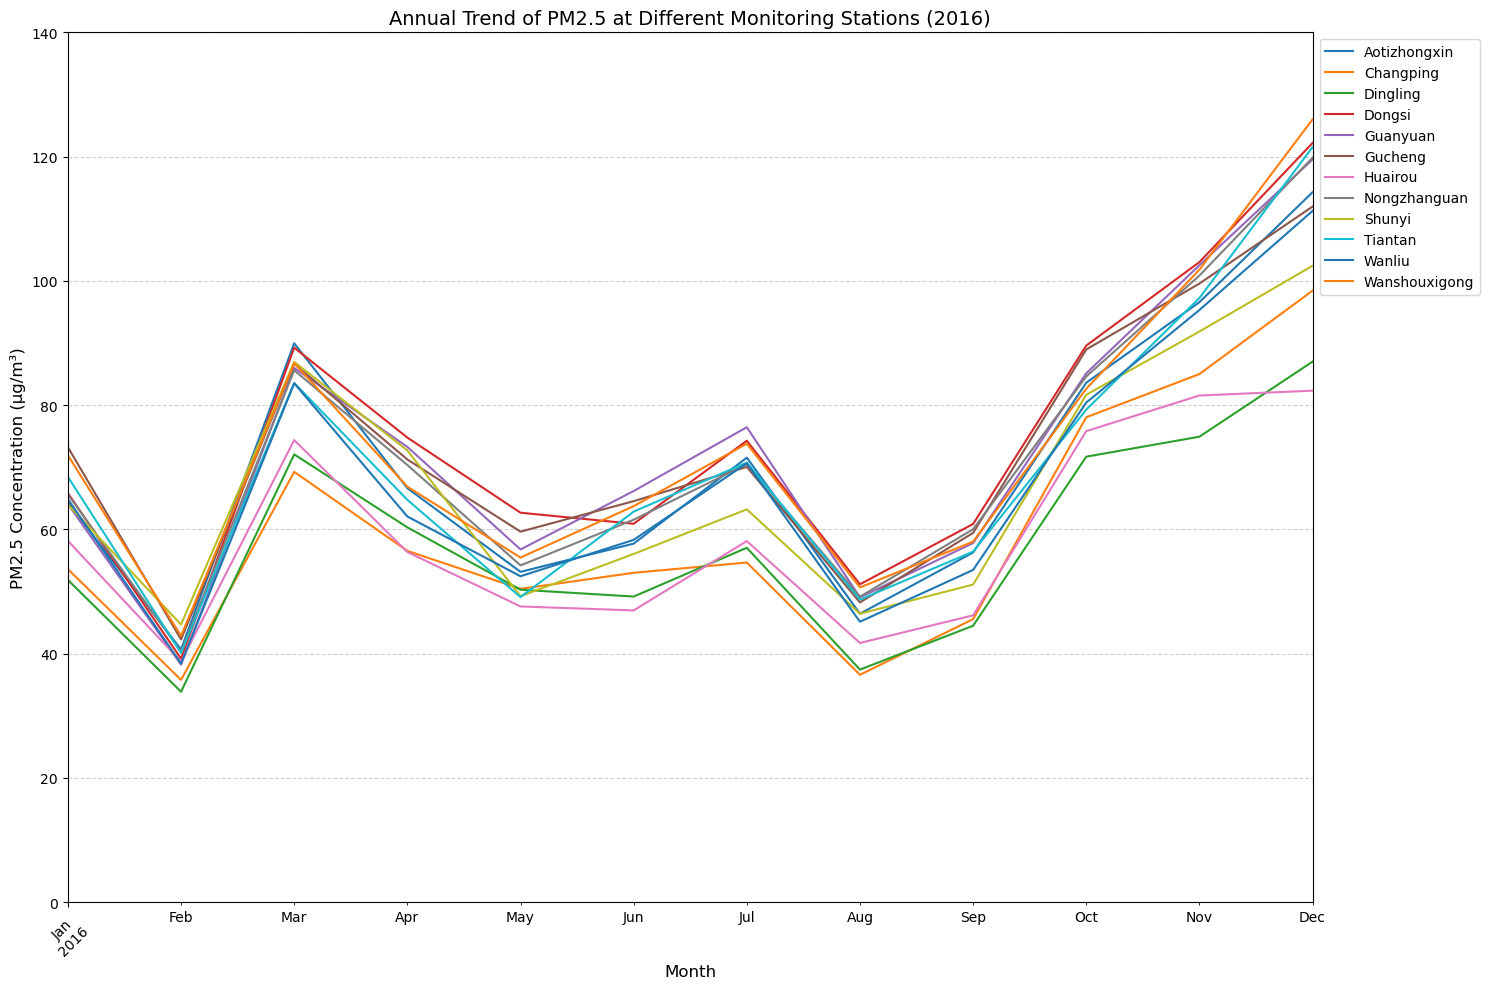

In [22]:
stations=df_merged['station'].unique() # Mengambil nilai unique dari station yang ada

plt.figure(figsize=(15,10)) # Membuat canvas plot
for station in (stations): # melakukan looping untuk meng-plot grafik line chart setiap station. 
    data_pm25=df_merged[df_merged['station']==station].loc['2016']
    data_pm25['PM2.5'].resample('MS').mean().plot(label=station)
plt.ylim(0,140) # membatasi range nilai y konsentrasi pm2.5
plt.xlabel("Month", fontsize=12) # menamai label x
plt.ylabel("PM2.5 Concentration (µg/m³)", fontsize=12) # menamai label y
plt.title("Annual Trend of PM2.5 at Different Monitoring Stations (2016)", fontsize=14)  # menamai judul plot
plt.legend(loc='upper left', bbox_to_anchor=(1,1), fontsize=10) # menampilkan legenda
plt.xticks(rotation=45)  # merotasi label x
plt.grid(True, linestyle='--', alpha=0.6)  # menampilkan grid

plt.tight_layout() # memperbaiki layout plot
plt.show()

### Pertanyaan 2:

In [23]:
# Mengambil data yang diperlukan, data polutan, temperatur, station, dan mengambil data hanya untuk station shunyi pada tahun 2016.
df_filtered=df_merged[['CO','PM2.5','NO2','TEMP','station']].loc['2016']
df_Shunyi=df_filtered[df_filtered['station']=='Shunyi']
df_Shunyi_daily=df_Shunyi.iloc[:, :4].resample('D').mean() # Mengambil data harian

In [24]:
# Mengelompokkan data berdasarkan musim
Shunyi_MAM=df_Shunyi_daily[df_Shunyi_daily.index.month.isin([3,4,5])]
Shunyi_JJA=df_Shunyi_daily[df_Shunyi_daily.index.month.isin([6,7,8])]
Shunyi_SON=df_Shunyi_daily[df_Shunyi_daily.index.month.isin([9,10,11])]
Shunyi_DJF=df_Shunyi_daily[df_Shunyi_daily.index.month.isin([12,1,2])]

In [25]:
# Menghitung matriks korelasi setiap musim
Corr_MAM=Shunyi_MAM.corr()['TEMP'].drop('TEMP')
Corr_JJA=Shunyi_JJA.corr()['TEMP'].drop('TEMP')
Corr_SON=Shunyi_SON.corr()['TEMP'].drop('TEMP')
Corr_DJF=Shunyi_DJF.corr()['TEMP'].drop('TEMP')

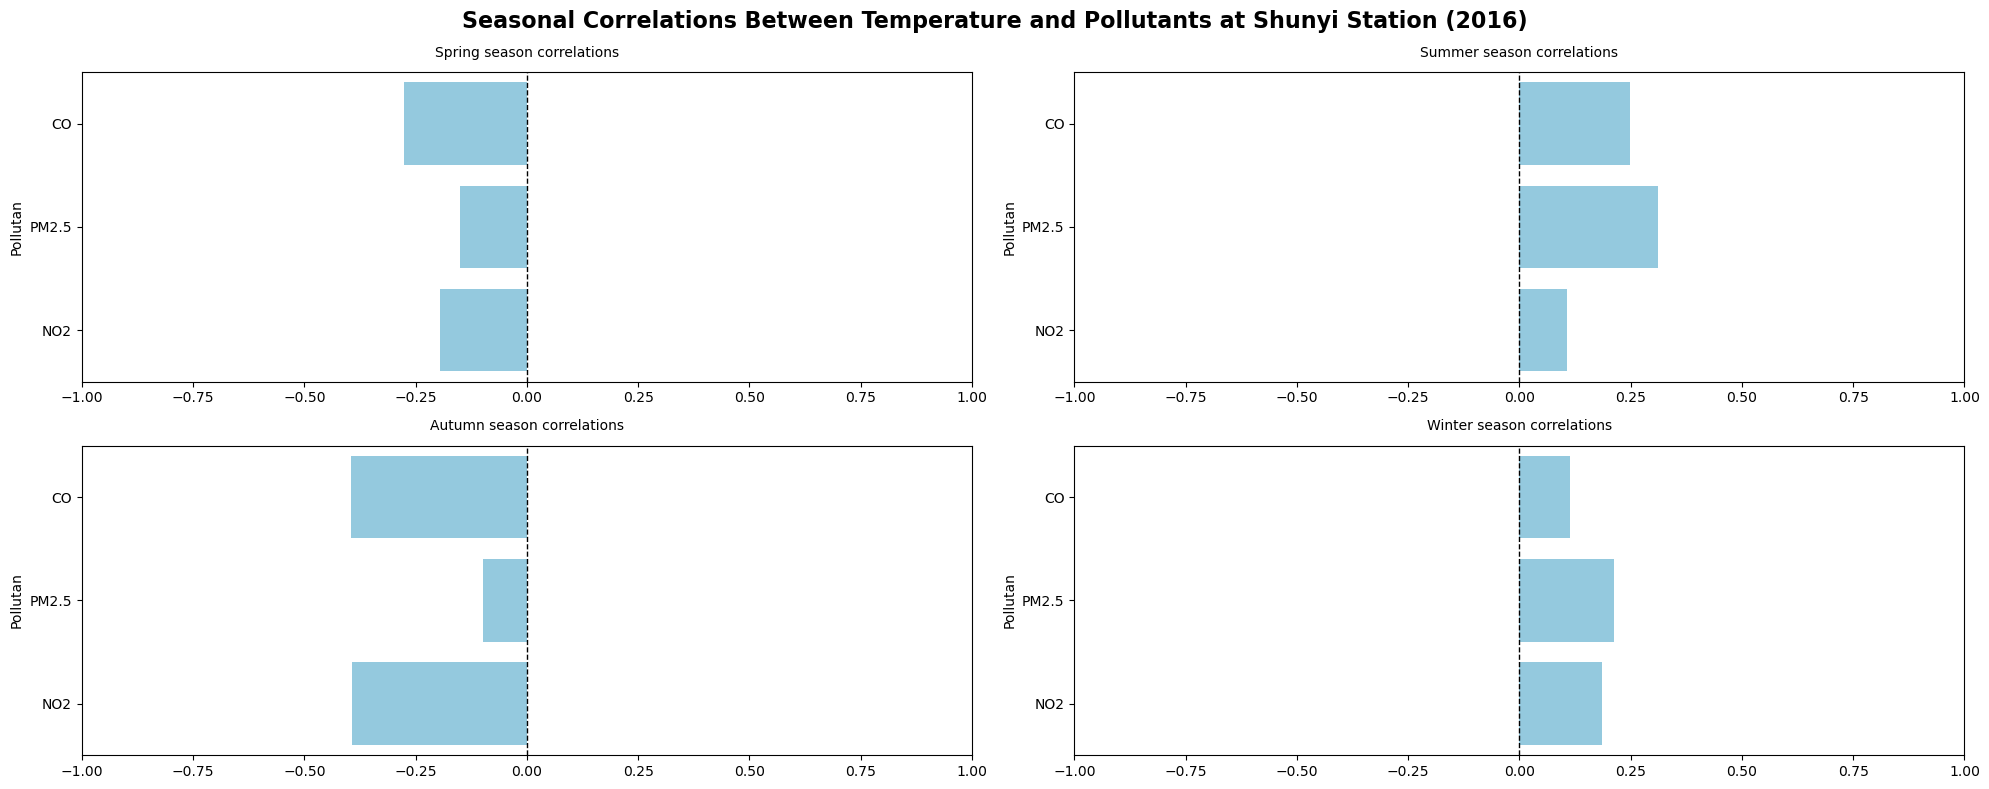

In [26]:
# Melakukan looping untuk membuat plot bar setiap musim
fig, axes=plt.subplots(2,2, figsize=(20,8))
axes=axes.flatten()
Corr_list=[Corr_MAM,Corr_JJA,Corr_SON,Corr_DJF]
captions = [
    "Spring season correlations",
    "Summer season correlations",
    "Autumn season correlations",
    "Winter season correlations"
]
fig.suptitle("Seasonal Correlations Between Temperature and Pollutants at Shunyi Station (2016)", 
             fontsize=16, fontweight='bold')
for i in range(4):
    sns.barplot(y=Corr_list[i].index, x=Corr_list[i].values, ax=axes[i], color='skyblue')
    axes[i].set_xlim(-1,1)
    axes[i].set_ylabel('Pollutan')
    axes[i].axvline(0, linestyle='--', linewidth=1, color='black')
    axes[i].text(0.5, 1.05, captions[i], fontsize=10, ha='center', transform=axes[i].transAxes)
    
    
plt.tight_layout()
plt.show()

**Insight:**
- Tren konsentrasi PM2.5 di semua stasiun cukup fluktuatif sepanjang tahun 2016. Terdapat tren penurunan di pertengahan tahun bulan juli agustus (Musim Panas) dan tren peningkatan di bulan oktober sampai desember (Musim Gugur - Musim Dingin). 
- Pada tahun 2016, polutan cenderung memiliki korelasi bernilai positif di musim panas dan musim dingin. Sedangkan pada musim transisi (semi dan gugur), korelasi bernilai negatif. Ini mengartikan pada musim panas dan dingin peningkatan/penurunan temperatur mengakibatkan peningkatan/penurunan polutan. Dan pada musim transisi, peningkatan/penurunan temperatur justru menurunkan/meningkatkan polutan. 

## Analisis Lanjutan (Opsional)

Analisis Klasifikasi Konsentrasi PM2.5 di Station Aotizhongxin, Dongsi, Tiantan, dan Wanliu.
Analisis ini dilakukan untuk melihat kualitas udara di tiap stasiun dengan parameter konsentrasi PM2.5 

In [27]:
df_PM25=df_merged[['PM2.5','station']] # Mengambil data yang digunakan

In [28]:
df_PM25_Aotizhongxin=df_PM25[df_PM25['station']=='Aotizhongxin'] # Mengfilter data tiap station
df_PM25_Dongsi=df_PM25[df_PM25['station']=='Dongsi']
df_PM25_Tiantan=df_PM25[df_PM25['station']=='Tiantan']
df_PM25_Wanliu=df_PM25[df_PM25['station']=='Wanliu']

In [29]:
stations=[df_PM25_Aotizhongxin,df_PM25_Dongsi,df_PM25_Tiantan,df_PM25_Wanliu] # List stations

In [30]:
def classify_PM25(value):
    if value<=25:
        return 'Good'
    elif value<=50:
        return 'Fair'
    elif value<=100:
        return 'Poor'
    elif value<=300:
        return 'Very Poor'

ordered_index=['Good','Fair','Poor','Very Poor']
# functon untuk mengganti nilai konsentrasi PM2.5 menjadi kategori

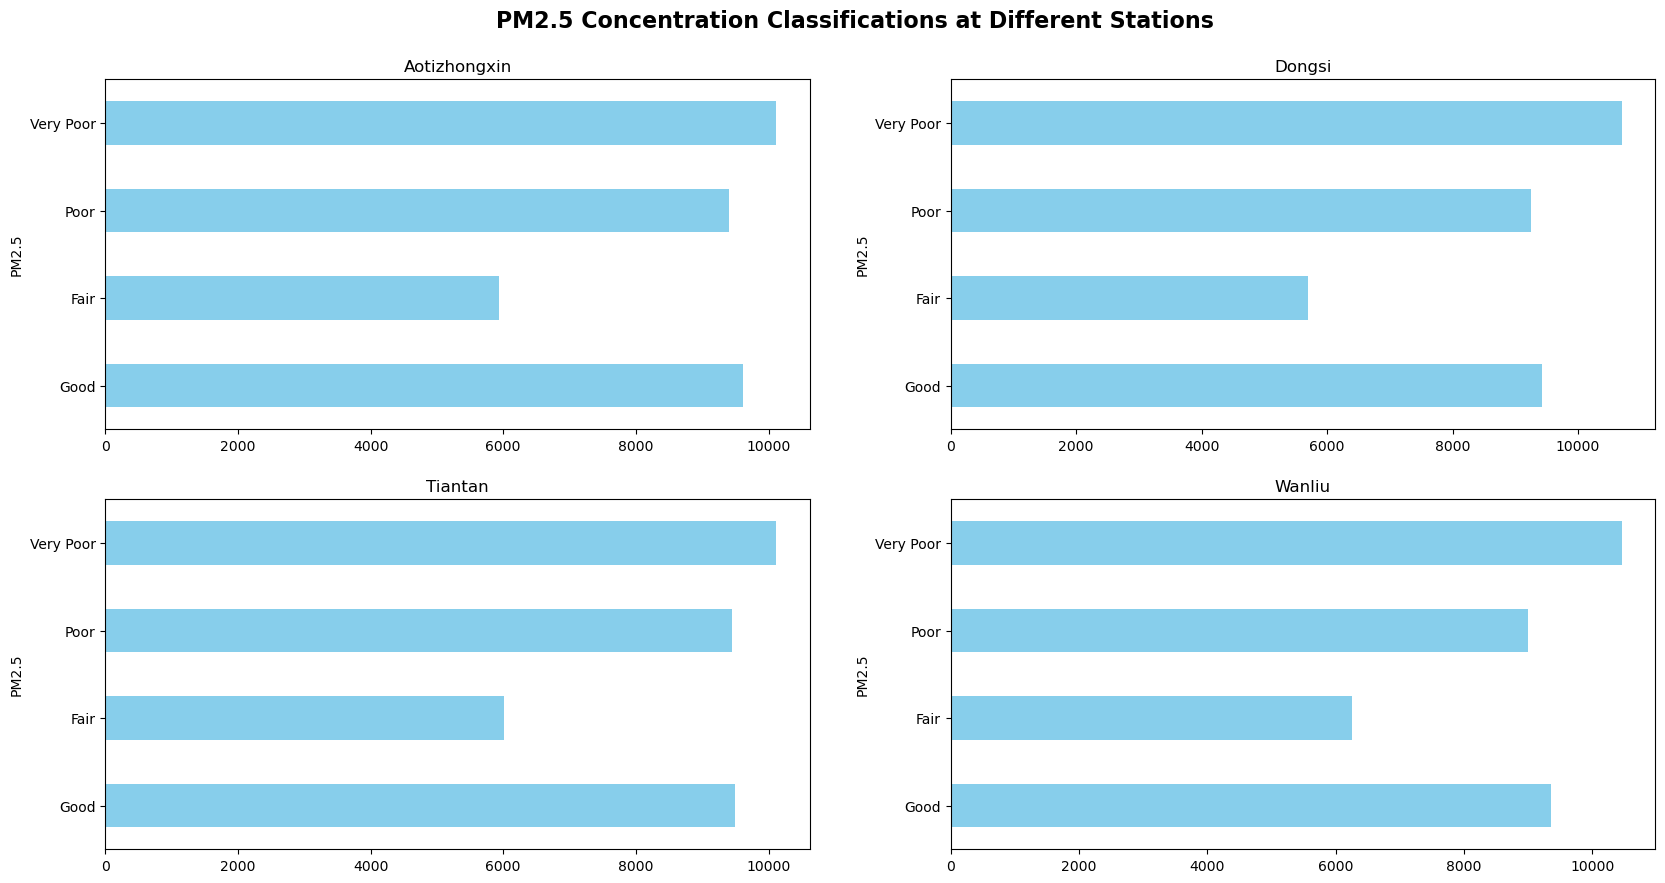

In [31]:
fig,axes=plt.subplots(2,2, figsize=(20,10))
axes=axes.flatten()
plt.suptitle("PM2.5 Concentration Classifications at Different Stations", fontsize=16, fontweight='bold', position=(0.5,0.95))
for i,station in enumerate(stations):
    valuecounts=station['PM2.5'].apply(classify_PM25).value_counts() #Menhitung jumlah data tiap kategori
    valuecounts.reindex(ordered_index ).plot(kind='barh', ax=axes[i], color='skyblue')
    axes[i].set_title(station['station'].iloc[0])

In [32]:
# df_merged.to_csv('dashboard/main_data.csv', index=True) # Menyimpan data yang sudah dibersihkan untuk dashboard

Terdapat kesamaan pola di tiap station, yang mengunjukkan tingginya frekuensi kualitas udara yang sangat buruk di beijing sepanjang tahun 2013 sampai dengan 2017. Namun, perlu diperhatikan, bahwa hal ini bisa diuji lebih lanjut lagi karena bisa jadi dipengaruhi oleh teknik capping yang digunakan saat penanganan outlier. Untuk analisis ini mungkin bisa dieksperimenkan, dengan menghapus data outlier karna bukan data time series. 

## Conclusion

- Tren PM2.5 sepanjang 2016 bersifat fluktuatif, menurun pada musim panas (Juli-Agustus) dan meningkat pada musim gugur hingga musim dingin (Oktober-Desember).
- Korelasi polutan dengan temperatur bersifat positif di musim panas dan dingin, sementara di musim transisi (semi dan gugur) cenderung negatif, menunjukkan bahwa perubahan suhu mempengaruhi polutan secara berbeda di tiap musim.